In [1]:
# Task 1 - Import all the necessary modules 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Task 2 - Load the dataset 

df = pd.read_csv("covid 19.csv")

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
214889,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-04,530,0,0,530,NaN
214891,NaN,Yemen,15.552727,48.516388,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,NaN,Zambia,-13.133897,27.849332,2022-03-04,313613,3958,0,309655,Africa
214893,NaN,Zimbabwe,-19.015438,29.154857,2022-03-04,238739,5397,0,233342,Africa


In [5]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,213348.000000,213348.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,25.899139,76.304185,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.426991,-27.932425,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,22.233350,21.752000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,41.166070,88.658375,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [6]:
# Task 3 - Check for missing values and replacing them 

df.isnull()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
214889,True,False,False,False,False,False,False,False,False,False
214890,True,False,False,False,False,False,False,False,False,True
214891,True,False,False,False,False,False,False,False,False,False
214892,True,False,False,False,False,False,False,False,False,False


In [7]:
df['Province/State'] = df['Province/State'].fillna(df['Province/State'].mode()[0])
print(df)

       Province/State        Country/Region        Lat        Long   
0             Alberta           Afghanistan  33.939110   67.709953  \
1             Alberta               Albania  41.153300   20.168300   
2             Alberta               Algeria  28.033900    1.659600   
3             Alberta               Andorra  42.506300    1.521800   
4             Alberta                Angola -11.202700   17.873900   
...               ...                   ...        ...         ...   
214889        Alberta    West Bank and Gaza  31.952200   35.233200   
214890        Alberta  Winter Olympics 2022  39.904200  116.407400   
214891        Alberta                 Yemen  15.552727   48.516388   
214892        Alberta                Zambia -13.133897   27.849332   
214893        Alberta              Zimbabwe -19.015438   29.154857   

              Date  Confirmed  Deaths  Recovered  Active   
0       2020-01-22          0       0          0       0  \
1       2020-01-22          0       0  

In [8]:
# Checking the dimensions of the shape 

# Assuming df is your DataFrame
dimensions = df.shape
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])


Number of rows: 214894
Number of columns: 10


In [9]:
# Checking the datatype of the variables 

data_types_summary = df.dtypes
print("Data types summary:")
print(data_types_summary)

# Step 2: Convert variables to the appropriate data type if needed
# Example: Convert columns to the correct data type
df['Country/Region'] = df['Country/Region'].astype('object')

Data types summary:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [10]:
# Filter rows where Country/Region is 'India'
india_data = df[df['Country/Region'] == 'India']
print("Data for India:")
print(india_data.head())

# Filter rows where Confirmed cases are greater than 10000
high_confirmed_cases = df[df['Confirmed'] > 10000]
print("Countries with Confirmed Cases > 10000:")
print(high_confirmed_cases.head())

# Filter rows where WHO Region is 'Americas' and Confirmed cases are greater than 50000
americas_high_confirmed = df[(df['WHO Region'] == 'Americas') & (df['Confirmed'] > 50000)]
print("Countries in Americas with Confirmed Cases > 50000:")
print(americas_high_confirmed.head())


Data for India:
     Province/State Country/Region        Lat      Long        Date   
145         Alberta          India  20.593684  78.96288  2020-01-22  \
423         Alberta          India  20.593684  78.96288  2020-01-23   
701         Alberta          India  20.593684  78.96288  2020-01-24   
979         Alberta          India  20.593684  78.96288  2020-01-25   
1257        Alberta          India  20.593684  78.96288  2020-01-26   

      Confirmed  Deaths  Recovered  Active       WHO Region  
145           0       0          0       0  South-East Asia  
423           0       0          0       0  South-East Asia  
701           0       0          0       0  South-East Asia  
979           0       0          0       0  South-East Asia  
1257          0       0          0       0  South-East Asia  
Countries with Confirmed Cases > 10000:
     Province/State Country/Region      Lat      Long        Date  Confirmed   
3128          Hubei          China  30.9756  112.2707  2020-02-02

In [11]:
# Select specific columns after filtering
filtered_data = df[df['Country/Region'] == 'India'][['Date', 'Confirmed', 'Deaths']]
print("Filtered data for India:")
print(filtered_data.head())

Filtered data for India:
            Date  Confirmed  Deaths
145   2020-01-22          0       0
423   2020-01-23          0       0
701   2020-01-24          0       0
979   2020-01-25          0       0
1257  2020-01-26          0       0


In [12]:
# Combining multiple conditions using | (OR) or & (AND)
combined_filter = df[(df['Country/Region'] == 'India') | (df['Country/Region'] == 'USA')]
print("Data for India or USA:")
print(combined_filter.head())


Data for India or USA:
     Province/State Country/Region        Lat      Long        Date   
145         Alberta          India  20.593684  78.96288  2020-01-22  \
423         Alberta          India  20.593684  78.96288  2020-01-23   
701         Alberta          India  20.593684  78.96288  2020-01-24   
979         Alberta          India  20.593684  78.96288  2020-01-25   
1257        Alberta          India  20.593684  78.96288  2020-01-26   

      Confirmed  Deaths  Recovered  Active       WHO Region  
145           0       0          0       0  South-East Asia  
423           0       0          0       0  South-East Asia  
701           0       0          0       0  South-East Asia  
979           0       0          0       0  South-East Asia  
1257          0       0          0       0  South-East Asia  


In [13]:
# Remove Duplicates 

non_dup = df[~df.duplicated("Country/Region")]
print(non_dup)

    Province/State        Country/Region        Lat        Long        Date   
0          Alberta           Afghanistan  33.939110   67.709953  2020-01-22  \
1          Alberta               Albania  41.153300   20.168300  2020-01-22   
2          Alberta               Algeria  28.033900    1.659600  2020-01-22   
3          Alberta               Andorra  42.506300    1.521800  2020-01-22   
4          Alberta                Angola -11.202700   17.873900  2020-01-22   
..             ...                   ...        ...         ...         ...   
273        Alberta    West Bank and Gaza  31.952200   35.233200  2020-01-22   
274        Alberta  Winter Olympics 2022  39.904200  116.407400  2020-01-22   
275        Alberta                 Yemen  15.552727   48.516388  2020-01-22   
276        Alberta                Zambia -13.133897   27.849332  2020-01-22   
277        Alberta              Zimbabwe -19.015438   29.154857  2020-01-22   

     Confirmed  Deaths  Recovered  Active          

In [14]:
# Factorize 

df['Country/Region'] = pd.factorize(df['Country/Region']) [0]
print(df)

       Province/State  Country/Region        Lat        Long        Date   
0             Alberta               0  33.939110   67.709953  2020-01-22  \
1             Alberta               1  41.153300   20.168300  2020-01-22   
2             Alberta               2  28.033900    1.659600  2020-01-22   
3             Alberta               3  42.506300    1.521800  2020-01-22   
4             Alberta               4 -11.202700   17.873900  2020-01-22   
...               ...             ...        ...         ...         ...   
214889        Alberta             192  31.952200   35.233200  2022-03-04   
214890        Alberta             193  39.904200  116.407400  2022-03-04   
214891        Alberta             194  15.552727   48.516388  2022-03-04   
214892        Alberta             195 -13.133897   27.849332  2022-03-04   
214893        Alberta             196 -19.015438   29.154857  2022-03-04   

        Confirmed  Deaths  Recovered  Active             WHO Region  
0               0

C:\Users\Smit Joshi\AppData\Local\Temp\ipykernel_23192\4259505129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Country/Region'])  # Use df['Deaths'] to access the "Deaths" column data


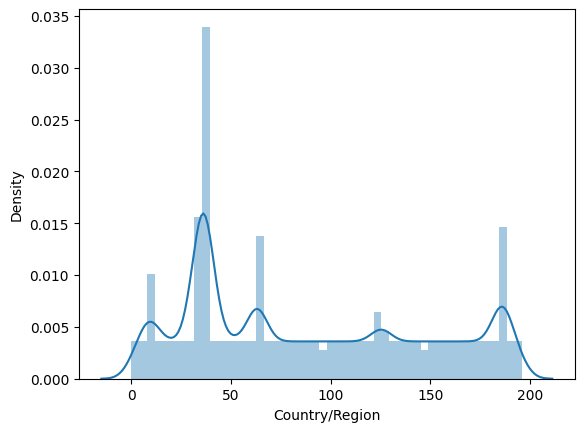

In [15]:
# Normalization
sns.distplot(df['Country/Region'])  # Use df['Deaths'] to access the "Deaths" column data
plt.show()

# X axis is indicating the index pos of each country
# Y axis is indicating the density of distribution of deaths across the countries/regions


In [16]:
df_copy = df.copy()
df_copy['Country/Region'] = df_copy['Country/Region'] / df_copy['Country/Region'].abs().max()


C:\Users\Smit Joshi\AppData\Local\Temp\ipykernel_23192\3597075517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Country/Region'])


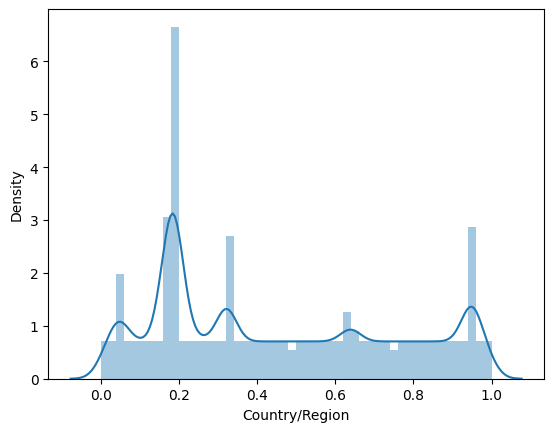

In [17]:
sns.distplot(df_copy['Country/Region'])
plt.show()

In [18]:
# Z index scaling 
z_copy = df_copy.copy()
for col in ['Country/Region']:
    z_copy[col] = (z_copy[col] - z_copy[col].mean()) / z_copy[col].std()


C:\Users\Smit Joshi\AppData\Local\Temp\ipykernel_23192\836488490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_copy['Country/Region'])


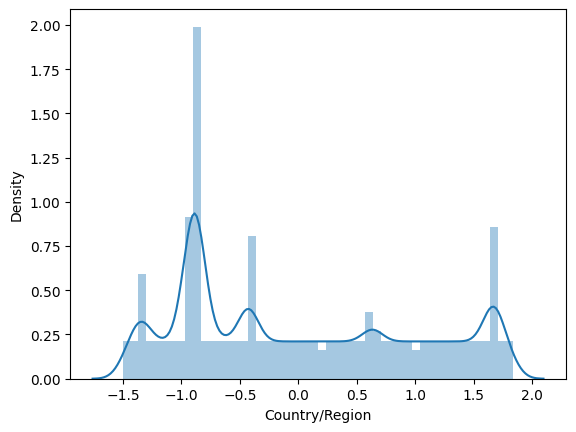

In [19]:
sns.distplot(z_copy['Country/Region'])
plt.show()

# why the values are ranging in negative?

If the x-axis values range from -1.5 to 2.0 after Z index scaling, it suggests that the original data's distribution had a mean around 0 and a standard deviation around 1.

Z-score normalization, or Z index scaling, transforms the data such that the mean becomes 0 and the standard deviation becomes 1. This means that the values are centered around 0 and spread out with a standard deviation of 1.

The negative values on the x-axis indicate that the original values were below the mean, while the positive values indicate that the original values were above the mean. The range from -1.5 to 2.0 suggests that the original data had a spread of approximately 3.5 standard deviations, with values extending beyond one standard deviation in both directions.